In [1]:
from sklearn.datasets import load_wine, load_iris, load_breast_cancer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
wine = load_wine()
breast = load_breast_cancer()

In [3]:
X = wine.data
y = wine.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

# Bagging

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=1)

bag = BaggingClassifier(tree, n_estimators=1000, n_jobs=-1, random_state=1)
tree.fit(X_train, y_train)
bag = bag.fit(X_train, y_train)

In [6]:
from sklearn.metrics import classification_report

def get_score(estimator):
    y_pred = estimator.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Cross validation score tree", cross_val_score(estimator, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1).mean())

In [7]:
get_score(tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Cross validation score tree 0.8729064039408867


In [8]:
param_grid = {
    "n_estimators" : [100, 300, 600, 1000]
}

gs = GridSearchCV(bag, param_grid, scoring='accuracy', refit=True, n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                                         n_estimators=1000, n_jobs=-1,
                                         random_state=1),
             n_jobs=-1, param_grid={'n_estimators': [100, 300, 600, 1000]},
             scoring='accuracy')

In [9]:
gs = gs.best_estimator_

In [10]:
get_score(gs)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Cross validation score tree 0.9714285714285715


In [11]:
pipe_lr = make_pipeline(StandardScaler(), PCA(),  LogisticRegression(multi_class="ovr", random_state=1))
pipe_lr.fit(X_train, y_train)
get_score(pipe_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Cross validation score tree 0.9857142857142858


c:\Users\Andrii\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [12]:
from sklearn.model_selection import learning_curve

def show_learning_curve(estimator):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10, n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, linestyle='-',marker='o', color='navy', label='Training accuracy')
    plt.plot(train_sizes, test_mean, linestyle='-',marker='s', color='green', label='Validation accuracy')

    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, color='blue', alpha=0.5)
    plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, alpha=0.15,
                 color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8, 1.03])
    plt.show()

In [13]:
# gridsearch for logistic regression

param_grid = {
    "pca__n_components" : [2, 4, 5, 6],
    "logisticregression__C" : [0.0001, 0.001, 0.01, 0.1, 1],
    "logisticregression__penalty" : ['l1' , 'l2'],
    "logisticregression__solver" : ['liblinear']
}

gs_lr = GridSearchCV(pipe_lr, param_grid, cv=10, scoring="accuracy", n_jobs=-1, refit=True)
gs_lr.fit(X_train, y_train)

c:\Users\Andrii\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression(multi_class='ovr',
                                                           random_state=1))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear'],
                         'pca__n_components': [2, 4, 5, 6]},
             scoring='accuracy')

In [14]:
lr_best = gs_lr.best_estimator_

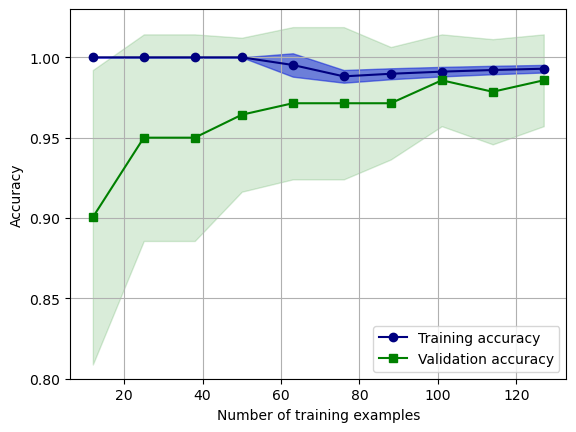

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Cross validation score tree 0.9714285714285715


In [15]:
show_learning_curve(lr_best)
get_score(lr_best)

# AdaBoost


In [16]:
tree = DecisionTreeClassifier(max_depth=1, random_state=1)

tree.fit(X_train, y_train)
get_score(tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.54      0.93      0.68        14
           2       0.00      0.00      0.00        10

    accuracy                           0.67        36
   macro avg       0.49      0.62      0.53        36
weighted avg       0.52      0.67      0.57        36

Cross validation score tree 0.6051724137931034


In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(tree, n_estimators=100, learning_rate=0.01, random_state=1)
ada.fit(X_train, y_train)

c:\Users\Andrii\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=100, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Cross validation score tree 0.9219211822660098


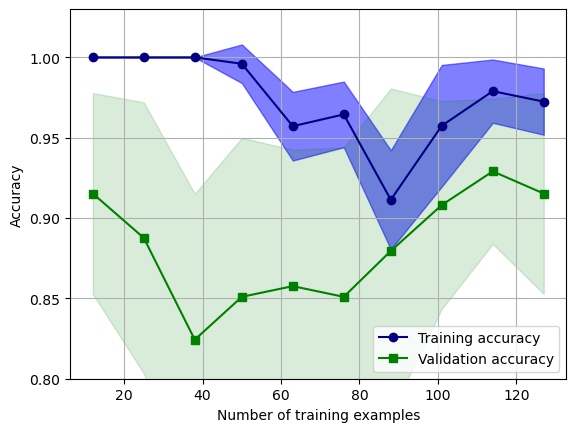

In [18]:
get_score(ada)
show_learning_curve(ada)

In [19]:
param_grid = {
    "n_estimators" : [100, 500, 1000],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

gs = GridSearchCV(ada, param_grid, cv=10, scoring='accuracy', refit=True, n_jobs=-1)
gs.fit(X_train, y_train)

c:\Users\Andrii\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=1),
                                          learning_rate=0.01, n_estimators=100,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [20]:
best_ada= gs.best_estimator_

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.87      0.93      0.90        14
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

Cross validation score tree 0.9507389162561577


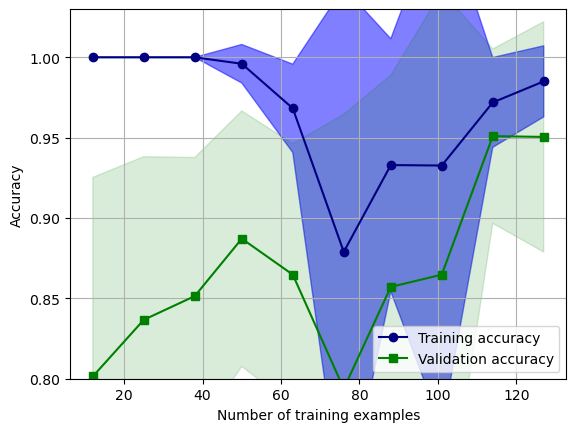

In [21]:
get_score(best_ada)
show_learning_curve(best_ada)

# XGboost

In [22]:
df = pd.read_csv("CSV/churn.csv")

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
import xgboost as xgb

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop 'customerID' since it's irrelevant
categorical_cols.remove('customerID')



In [25]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)

In [26]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [31]:
for col in categorical_cols:
    if col == 'Churn':
        break
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    tree_method="hist",  
    enable_categorical=True,  
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
get_score(model)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Cross validation score tree 0.7948173446535151


In [42]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(
    max_depth=5,
    n_jobs=-1
)

model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(max_depth=5, n_jobs=-1)

In [44]:
get_score(model_lgb)


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Cross validation score tree 0.795348943500483


In [62]:
import catboost as ctb

model_cat = ctb.CatBoostClassifier(n_estimators=100, cat_features=categorical_cols[:16])

model_cat.fit(X_train, y_train)

Learning rate set to 0.178046
0:	learn: 0.6287422	total: 179ms	remaining: 17.8s
1:	learn: 0.5795173	total: 226ms	remaining: 11.1s
2:	learn: 0.5425256	total: 278ms	remaining: 8.98s
3:	learn: 0.5130759	total: 327ms	remaining: 7.85s
4:	learn: 0.4928445	total: 373ms	remaining: 7.08s
5:	learn: 0.4755040	total: 426ms	remaining: 6.68s
6:	learn: 0.4626295	total: 472ms	remaining: 6.28s
7:	learn: 0.4538585	total: 504ms	remaining: 5.8s
8:	learn: 0.4457886	total: 543ms	remaining: 5.49s
9:	learn: 0.4376023	total: 587ms	remaining: 5.29s
10:	learn: 0.4315083	total: 631ms	remaining: 5.11s
11:	learn: 0.4268902	total: 676ms	remaining: 4.96s
12:	learn: 0.4218529	total: 723ms	remaining: 4.83s
13:	learn: 0.4177439	total: 768ms	remaining: 4.72s
14:	learn: 0.4149402	total: 813ms	remaining: 4.61s
15:	learn: 0.4124178	total: 859ms	remaining: 4.51s
16:	learn: 0.4110208	total: 889ms	remaining: 4.34s
17:	learn: 0.4108475	total: 898ms	remaining: 4.09s
18:	learn: 0.4084399	total: 944ms	remaining: 4.03s
19:	learn: 0

In [64]:
get_score(model_cat)
                 

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Cross validation score tree 0.8044023571278848
